##  Clustering project
by Samir Abou Jaoude , Ralph Gerges and Samer Al Zoer


----
## Goal : Clustering countries based on how developped they are.

## Imports and Data


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans
import seaborn as sns

In [6]:
df = pd.read_csv(r'C:/Users/User/Desktop/CIA_country.csv')

In [7]:
df.head(1)

Country                         Region  Population  Area (sq. mi.)  \
0  Afghanistan  ASIA (EX. NEAR EAST)             31056997          647500   

   Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  Net migration  \
0                        48.0                           0.0          23.06   

   Infant mortality (per 1000 births)  GDP ($ per capita)  Literacy (%)  \
0                              163.07               700.0          36.0   

   Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  Climate  Birthrate  \
0                3.2       12.13       0.22      87.65      1.0       46.6   

   Deathrate  Agriculture  Industry  Service  
0      20.34         0.38      0.24     0.38

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

## Data Preparation/cleaning


In [9]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

Fill in the missing Climate values based on the mean climate value for its region.

In [10]:
df['Climate'] = df.groupby('Region')['Climate'].transform(lambda x: x.fillna(x.mean()))

It looks like Literacy percentage is missing. Doing the same as we did before with Climate missing values and filling values with the mean Literacy % of the Region.

In [11]:
df['Literacy (%)'] = df.groupby('Region')['Literacy (%)'].transform(lambda x: x.fillna(x.mean()))

In [12]:
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                           0
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                                0
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [13]:
df[df['Agriculture'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

In [14]:
#checking the area and country name of countries with NULL Agriculture values.
df.loc[df['Agriculture'].isnull(),("Country","Area (sq. mi.)")]   

Country  Area (sq. mi.)
3          American Samoa             199
4                 Andorra             468
78              Gibraltar               7
80              Greenland         2166086
83                   Guam             541
134               Mayotte             374
140            Montserrat             102
144                 Nauru              21
153    N. Mariana Islands             477
171          Saint Helena             413
174  St Pierre & Miquelon             242
177            San Marino              61
208     Turks & Caicos Is             430
221     Wallis and Futuna             274
223        Western Sahara          266000

We can notice that most of these countries are very small  with the exception of Greenland and Western Sahara.


In [15]:
df[df['Agriculture'].isnull()]

Country                               Region  Population  \
3          American Samoa  OCEANIA                                   57794   
4                 Andorra  WESTERN EUROPE                            71201   
78              Gibraltar  WESTERN EUROPE                            27928   
80              Greenland  NORTHERN AMERICA                          56361   
83                   Guam  OCEANIA                                  171019   
134               Mayotte  SUB-SAHARAN AFRICA                       201234   
140            Montserrat              LATIN AMER. & CARIB            9439   
144                 Nauru  OCEANIA                                   13287   
153    N. Mariana Islands  OCEANIA                                   82459   
171          Saint Helena  SUB-SAHARAN AFRICA                         7502   
174  St Pierre & Miquelon  NORTHERN AMERICA                           7026   
177            San Marino  WESTERN EUROPE                            29251   
208     Turks & Caicos Is              LATIN AMER. & CARIB           21152   
221     Wallis and Futuna  OCEANIA                                   16025   
223        Western Sahara  NORTHERN AFRICA                          273008   

     Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
3               199                       290.4                         58.29   
4               468                       152.1                          0.00   
78                7                      3989.7                        171.43   
80          2166086                         0.0                          2.04   
83              541                       316.1                         23.20   
134             374                       538.1                         49.52   
140             102                        92.5                         39.22   
144              21                       632.7                        142.86   
153             477                       172.9                        310.69   
171             413                        18.2                         14.53   
174             242                        29.0                         49.59   
177              61                       479.5                          0.00   
208             430                        49.2                         90.47   
221             274                        58.5                         47.08   
223          266000                         1.0                          0.42   

     Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
3           -20.71                                9.27              8000.0   
4             6.60                                4.05             19000.0   
78            0.00                                5.13             17500.0   
80           -8.37                               15.82             20000.0   
83            0.00                                6.94             21000.0   
134           6.78                               62.40              2600.0   
140           0.00                                7.35              3400.0   
144           0.00                                9.95              5000.0   
153           9.61                                7.11             12500.0   
171           0.00                               19.00              2500.0   
174          -4.86                                7.54              6900.0   
177          10.98                                5.73             34600.0   
208          11.68                               15.67              9600.0   
221            NaN                                 NaN              3700.0   
223            NaN                                 NaN                 NaN   

     Literacy (%)  Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  \
3       97.000000              259.5       10.00      15.00      75.00   
4      100.000000              497.2        2.22       0.00      97.78   
7

We can see that these countries have also missing values in the industry and service columns.

In [16]:
#filling these values with 0
df["Agriculture"] = df["Agriculture"].fillna(0)
df["Industry"]=df["Industry"].fillna(0)
df["Service"]=df["Service"].fillna(0)

In [17]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         3
Infant mortality (per 1000 births)    3
GDP ($ per capita)                    1
Literacy (%)                          0
Phones (per 1000)                     4
Arable (%)                            2
Crops (%)                             2
Other (%)                             2
Climate                               0
Birthrate                             3
Deathrate                             4
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

We are now missing values for only a few countries. We can drop these countries.

In [18]:
df = df.dropna()

## Exploratory Data Analysis/Data visualization

In [19]:
df.describe().transpose()

count          mean           std  \
Population                          218.0  2.987254e+07  1.201747e+08   
Area (sq. mi.)                      218.0  6.211827e+05  1.823293e+06   
Pop. Density (per sq. mi.)          218.0  3.860734e+02  1.693019e+03   
Coastline (coast/area ratio)        218.0  2.083706e+01  7.358774e+01   
Net migration                       218.0 -5.412844e-03  4.927332e+00   
Infant mortality (per 1000 births)  218.0  3.583312e+01  3.562166e+01   
GDP ($ per capita)                  218.0  9.785780e+03  1.012245e+04   
Literacy (%)                        218.0  8.353037e+01  1.925942e+01   
Phones (per 1000)                   218.0  2.341986e+02  2.263446e+02   
Arable (%)                          218.0  1.383528e+01  1.310570e+01   
Crops (%)                           218.0  4.498165e+00  8.344997e+00   
Other (%)                           218.0  8.166619e+01  1.623568e+01   
Climate                             218.0  2.173279e+00  7.032750e-01   
Birthrate                           218.0  2.213670e+01  1.119337e+01   
Deathrate                           218.0  9.275642e+00  5.038390e+00   
Agriculture                         218.0  1.445413e-01  1.480515e-01   
Industry                            218.0  2.695963e-01  1.496198e-01   
Service                             218.0  5.311422e-01  2.056130e-01   

                                        min          25%           50%  \
Population                          7026.00  477442.2500  5.335410e+06   
Area (sq. mi.)                         2.00    6995.0000  9.234550e+04   
Pop. Density (per sq. mi.)             0.00      28.4000  7.740000e+01   
Coastline (coast/area ratio)           0.00       0.0925  7.050000e-01   
Net migration                        -20.99      -0.9625  0.000000e+00   
Infant mortality (per 1000 births)     2.29       8.2900  2.104000e+01   
GDP ($ per capita)                   500.00    1900.0000  5.800000e+03   
Literacy (%)                          17.60      76.3000  9.240000e+01   
Phones (per 1000)                      0.20      36.4500  1.729000e+02   
Arable (%)                             0.00       3.1300  1.047500e+01   
Crops (%)                              0.00       0.1900  1.020000e+00   
Other (%)                             33.33      72.5725  8.588500e+01   
Climate                                1.00       2.0000  2.000000e+00   
Birthrate                              7.29      12.7175  1.879000e+01   
Deathrate                              2.29       5.8200  8.135000e+00   
Agriculture                            0.00       0.0330  9.300000e-02   
Industry                               0.00       0.1800  2.615000e-01   
Service                                0.00       0.4085  5.590000e-01   

                                             75%           max  
Population                          1.880989e+07  1.313974e+09  
Area (sq. mi.)                      4.493230e+05  1.707520e+07  
Pop. Density (per sq. mi.)          1.909750e+02  1.627150e+04  
Coastline (coast/area ratio)        9.145000e+00  8.706600e+02  
Net migration                       9.850000e-01  2.306000e+01  
Infant mortality (per 1000 births)  5.609500e+01  1.911900e+02  
GDP ($ per capita)                  1.570000e+04  5.510000e+04  
Literacy (%)                        9.800000e+01  1.000000e+02  
Phones (per 1000)                   3.920250e+02  1.035600e+03  
Arable (%)                          2.000000e+01  6.211000e+01  
Crops (%)                           4.427500e+00  5.068000e+01  
Other (%)                           9.548500e+01  1.000000e+02  
Climate                             3.000000e+00  4.000000e+00  
Birthrate                           2.986000e+01  5.073000e+01  
Deathrate                           1.089000e+01  2.974000e+01  
Agriculture                         2.167500e-01  7.690000e-01  
Industry                            3.397500e-01  9.060000e-01  
Service                             6.695000e-01  9.540000e-01

Let's do some visualizations.

<AxesSubplot:xlabel='Population'>

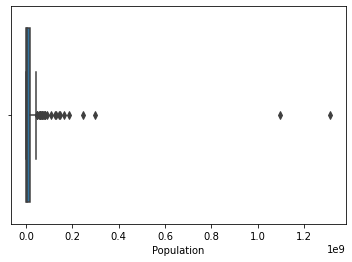

In [20]:
sns.boxplot(data=df,x='Population')

We can notice the boxplot is skewed due to a few large countries, let's show countries with less than 500 million people

<AxesSubplot:xlabel='Population'>

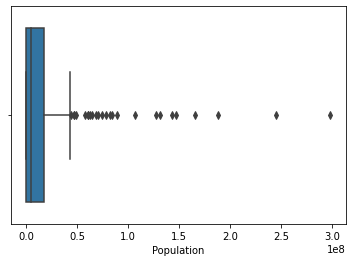

In [21]:
sns.boxplot(data=df[df['Population']<500000000],x='Population')

<AxesSubplot:xlabel='Population', ylabel='Count'>

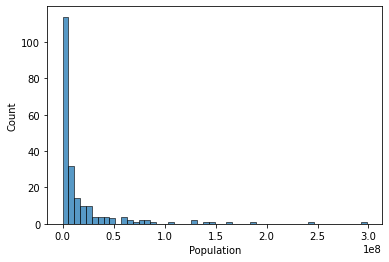

In [22]:
sns.histplot(data=df[df['Population']<400000000],x='Population')

<AxesSubplot:xlabel='GDP ($ per capita)', ylabel='Population'>

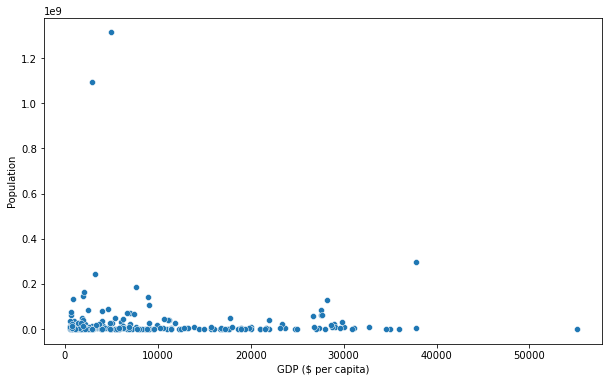

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Population')

Now let's explore GDP and Regions.

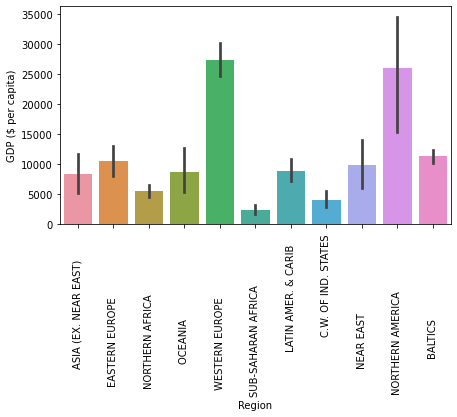

In [24]:
plt.figure(figsize=(7,4))
sns.barplot(data=df,y='GDP ($ per capita)',x='Region',estimator=np.mean)
plt.xticks(rotation=90);

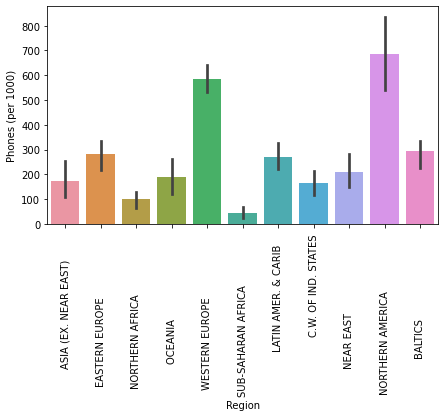

In [25]:
plt.figure(figsize=(7,4))
sns.barplot(data=df,y='Phones (per 1000)',x='Region',estimator=np.mean)
plt.xticks(rotation=90);

Western Europe and North America are the richest regions

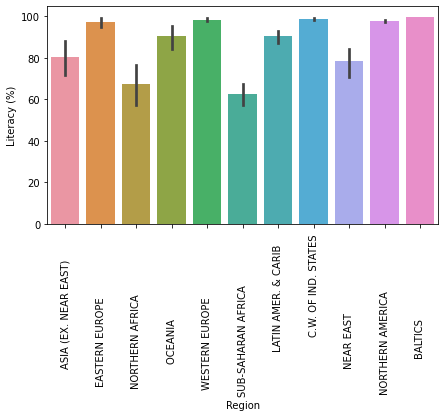

In [26]:
plt.figure(figsize=(7,4))
sns.barplot(data=df,y='Literacy (%)',x='Region',estimator=np.mean)
plt.xticks(rotation=90);

The literacy rate is defined by the percentage of the population of a given age group that can read and write.

Literacy percentage is lower in africa than other regions.

#### Scatterplot showing the relationship between Phones per 1000 people and the GDP per Capita .Coloring these points by Region.

<AxesSubplot:xlabel='GDP ($ per capita)', ylabel='Phones (per 1000)'>

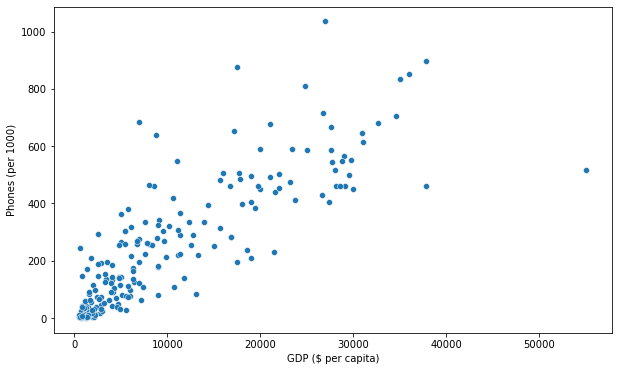

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Phones (per 1000)')

In [28]:
df[df["GDP ($ per capita)"]>50000]

Country                               Region  Population  \
121  Luxembourg  WESTERN EUROPE                           474413   

     Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
121            2586                       183.5                           0.0   

     Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
121           8.97                                4.81             55100.0   

     Literacy (%)  Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  \
121         100.0              515.4       23.28        0.4      76.32   

      Climate  Birthrate  Deathrate  Agriculture  Industry  Service  
121  3.095238      11.94       8.41         0.01      0.13     0.86

Luxembourg have the highest gdp per capita

Scatterplot showing the relationship between GDP per Capita and Literacy .

<AxesSubplot:xlabel='GDP ($ per capita)', ylabel='Literacy (%)'>

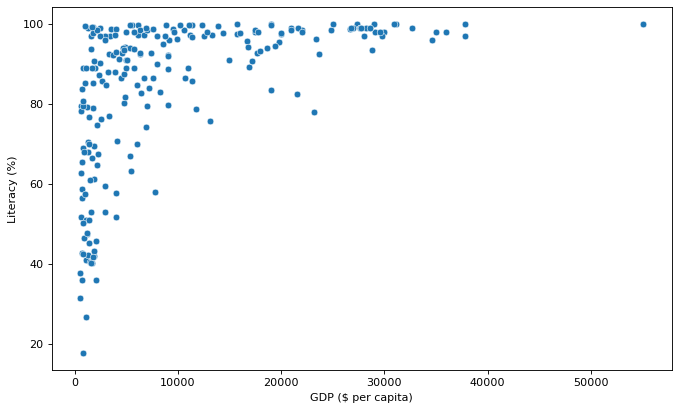

In [29]:
plt.figure(figsize=(10,6),dpi=80)
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Literacy (%)')#,hue='Region')

When the gdp per capita goes above 10000 dollars,the litteracy rate is above 85 percent, but when its less than 10000 $ the literacy ranges between 0 and 100.

In [30]:
min(df["Literacy (%)"])

17.6

In [31]:
df[df["Literacy (%)"]==17.6]

Country                               Region  Population  Area (sq. mi.)  \
151   Niger  SUB-SAHARAN AFRICA                     12525094         1267000   

     Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  Net migration  \
151                         9.9                           0.0          -0.67   

     Infant mortality (per 1000 births)  GDP ($ per capita)  Literacy (%)  \
151                              121.69               800.0          17.6   

     Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  Climate  Birthrate  \
151                1.9        3.54       0.01      96.45      1.0      50.73   

     Deathrate  Agriculture  Industry  Service  
151      20.91         0.39      0.17     0.44

Niger has the lowest litteracy rate

<AxesSubplot:xlabel='GDP ($ per capita)', ylabel='Infant mortality (per 1000 births)'>

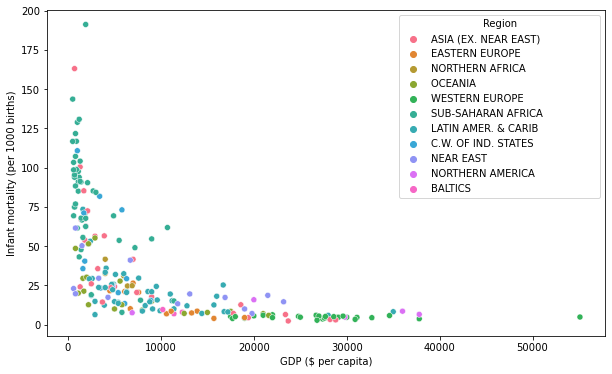

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Infant mortality (per 1000 births)',hue="Region")

<AxesSubplot:xlabel='GDP ($ per capita)', ylabel='Coastline (coast/area ratio)'>

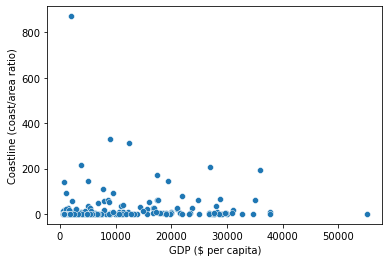

In [33]:
sns.scatterplot(data=df,x="GDP ($ per capita)",y="Coastline (coast/area ratio)")

In [34]:
df["GDP ($ per capita)"].describe()

count      218.000000
mean      9785.779817
std      10122.445270
min        500.000000
25%       1900.000000
50%       5800.000000
75%      15700.000000
max      55100.000000
Name: GDP ($ per capita), dtype: float64

In [35]:
#checking which regions have a gdp per capita lowest than the mean.
x=df.loc[df['GDP ($ per capita)'] <(df["GDP ($ per capita)"]).mean(), 'Region']

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


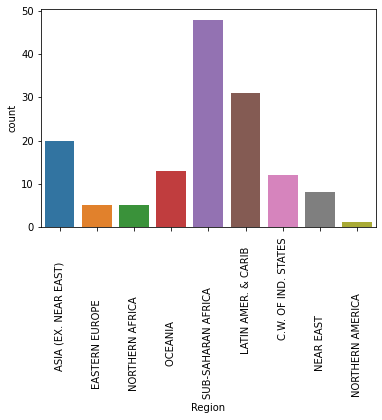

In [36]:
sns.countplot(x)
plt.xticks(rotation=90);

SUB SAHARAN AFRICA is the region with lowest GDP PER CAPITA.

In [37]:
df[(df['Region'].str.strip() == "NORTHERN AMERICA") & (df["GDP ($ per capita)"]<(df["GDP ($ per capita)"]).mean())]["Country"]

174    St Pierre & Miquelon
Name: Country, dtype: object

St Pierre & Miquelon is the only country in Northern America that have a gdp per capita less than the mean.

<AxesSubplot:xlabel='Birthrate', ylabel='GDP ($ per capita)'>

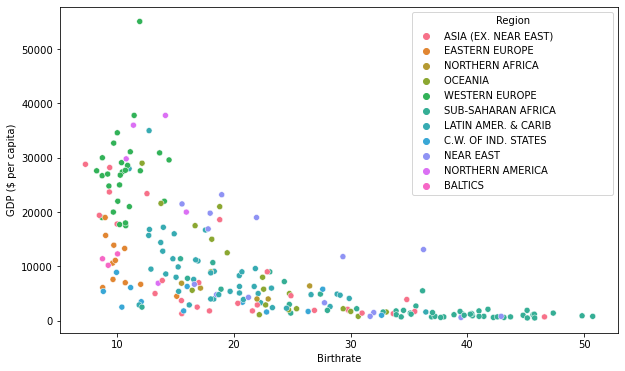

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,y='GDP ($ per capita)',x='Birthrate',hue="Region")

In [39]:
#checking which regions have birthrate more than the average
x=df.loc[df['Birthrate'] > df['Birthrate'].mean(), 'Region']

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


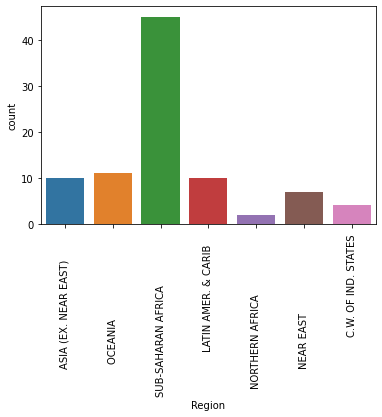

In [40]:
sns.countplot(x)
plt.xticks(rotation=90);

North America and Western Europe are not in the above plot that shows that more developped countries have low birth rate.

<AxesSubplot:xlabel='Deathrate', ylabel='GDP ($ per capita)'>

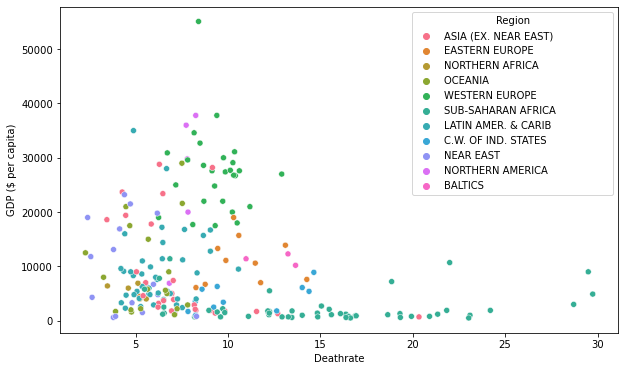

In [41]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,y='GDP ($ per capita)',x='Deathrate',hue="Region")

As we can see countries with high gdp have lower deathrate.

In [42]:
df['Deathrate'].describe()

count    218.000000
mean       9.275642
std        5.038390
min        2.290000
25%        5.820000
50%        8.135000
75%       10.890000
max       29.740000
Name: Deathrate, dtype: float64

In [43]:
#checking which regions have deathrate more than the average
x=df.loc[df['Deathrate'] >df['Deathrate'].mean(), 'Region']

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


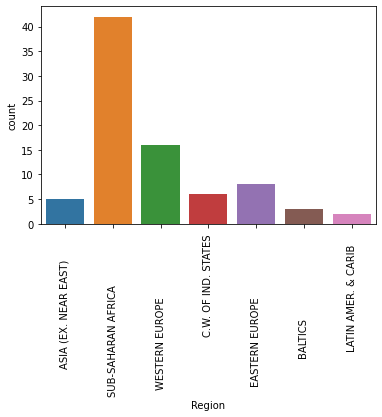

In [44]:
sns.countplot(x)
plt.xticks(rotation=90);

SUB SAHARAN AFRICA  and Western Europe has the most death rates

<AxesSubplot:xlabel='Literacy (%)', ylabel='Birthrate'>

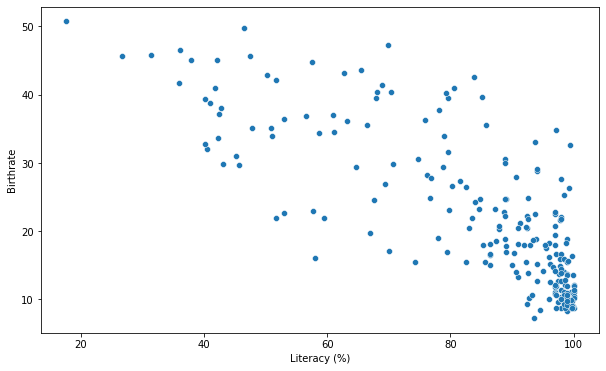

In [45]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,y='Birthrate',x='Literacy (%)')

The higher the literacy the lower the birthrate

### Information  ** The net migration rate is the difference between the number of immigrants (people coming into an area) and the number of emigrants (people leaving an area) divided by the population. When the number of immigrants is larger than the number of emigrants, a positive net migration rate occurs. A positive net migration rate indicates that there are more people entering than leaving an area. When more emigrate from a country, the result is a negative net migration rate, meaning that more people are leaving than entering the area. When there is an equal number of immigrants and emigrants, the net migration rate is balanced.**

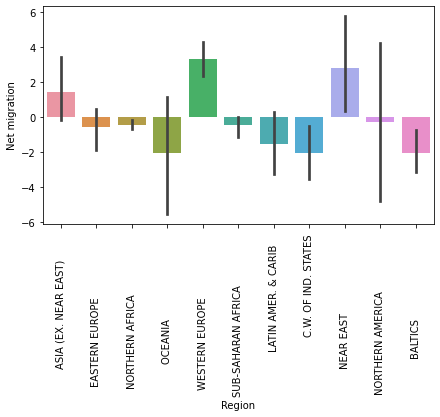

In [46]:
plt.figure(figsize=(7,4))
sns.barplot(data=df,y='Net migration',x='Region',estimator=np.mean)
plt.xticks(rotation=90);

In [47]:
df[(df['Region'].str.strip() == "NEAR EAST") & (df["Net migration"]>1)]["Country"]

15                  Bahrain
74               Gaza Strip
105                  Jordan
111                  Kuwait
166                   Qatar
212    United Arab Emirates
222               West Bank
Name: Country, dtype: object

Most of the immigrants are going to western europe and gulf countries(Qatar,Kuwait ...)

In [48]:
#checking net migration less than 0 per region.
df[df["Net migration"]<0]["Region"].value_counts()

LATIN AMER. & CARIB                    34
SUB-SAHARAN AFRICA                     18
C.W. OF IND. STATES                    10
ASIA (EX. NEAR EAST)                    9
EASTERN EUROPE                          5
OCEANIA                                 5
NORTHERN AFRICA                         4
BALTICS                                 3
NORTHERN AMERICA                        2
NEAR EAST                               1
Name: Region, dtype: int64

Most of the emigrants are coming from  LATIN AMER. & CARIB  and SUB-SAHARAN AFRICA 

## Data visualization summary

#### Western Europe and North America are the richest regions
#### Literacy percentage is lower in africa than other regions.
#### More developped countries have low birth rate.
#### Countries with high gdp have lower deathrate.
#### The higher the literacy the lower the birthrate
#### Most of the immmigrants are going to western europe and gulf countries(Qatar,Kuwait ...)


#### Most of the emigrants are coming from  LATIN AMER. & CARIB  and SUB-SAHARAN AFRICA 
#### Luxembourg have the highest gdp per capita
#### When the gdp per capita goes above 10000 dollars,the litteracy rate is above 85 percent, but when its less than 10000 the literacy ranges between 0 and 100.
#### SUB SAHARAN AFRICA is the region with lowest GDP PER CAPITA
#### SUB SAHARAN AFRICA is the region with the most death rates
 

# Feature Preparation

In [49]:
df["Country"].value_counts()

Afghanistan    1
Oman           1
Nauru          1
Nepal          1
Netherlands    1
              ..
Greece         1
Greenland      1
Grenada        1
Guadeloupe     1
Zimbabwe       1
Name: Country, Length: 218, dtype: int64

The Country column won't be useful for clustering, since its unique for each row.

In [50]:
X=df.drop("Country",axis=1)

## Removing multicollinearity

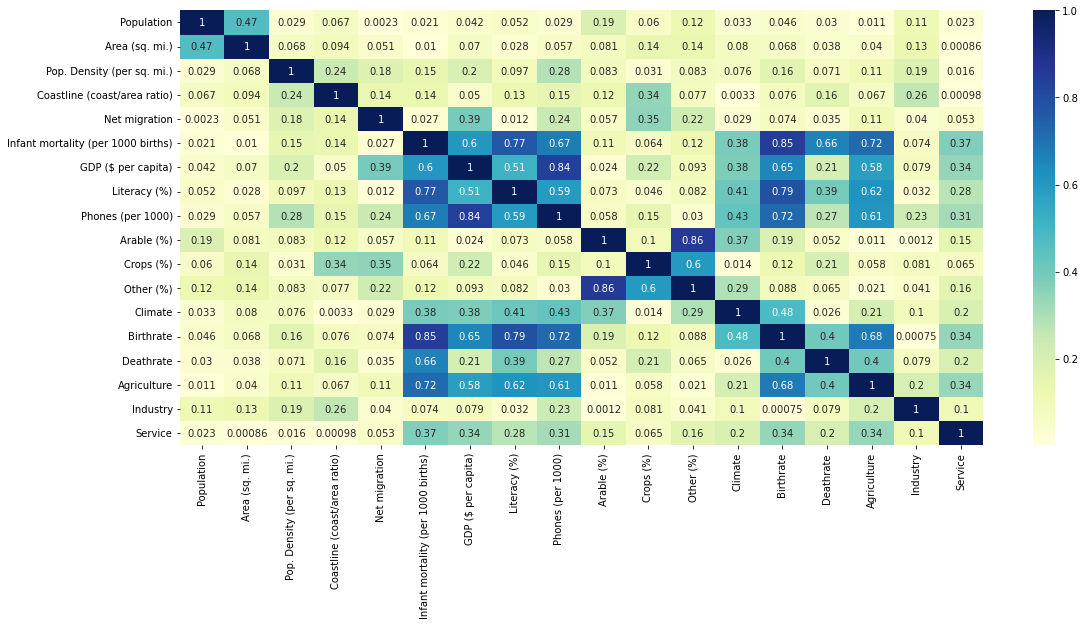

In [51]:
plt.figure(figsize=(18,8))
sns.heatmap(abs(X.corr()),annot=True ,cmap="YlGnBu" )  
plt.show()

#### We can clearly see that infant mortality is highly correlated with phones ,birth rate , death rate and agriculture,We can remove these 4 columns

In [52]:
X.drop(["Phones (per 1000)","Birthrate","Deathrate","Agriculture"],axis=1,inplace=True)

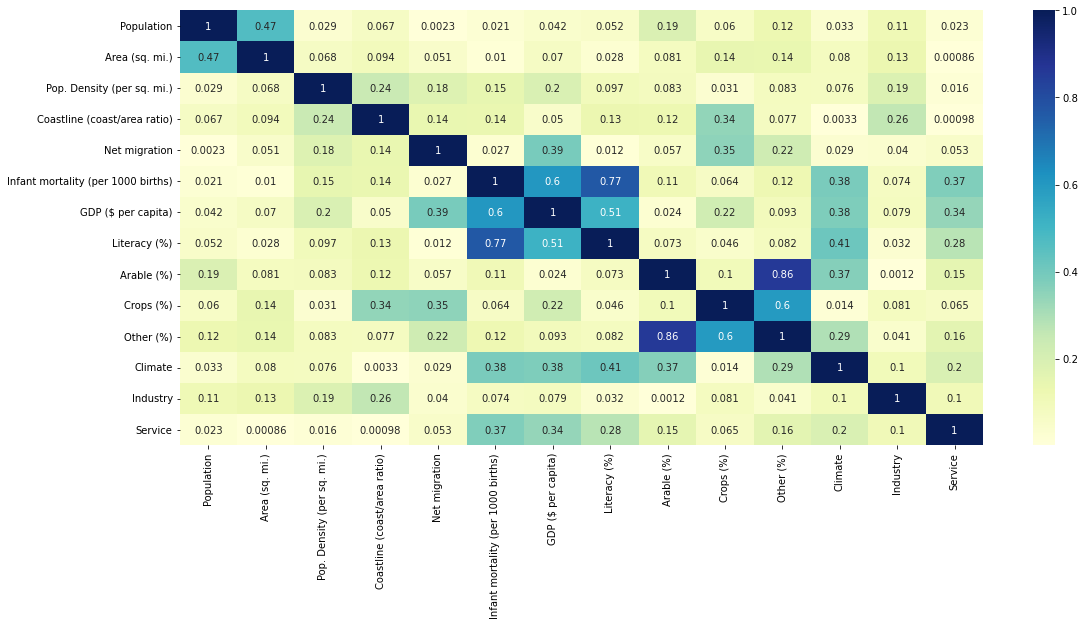

In [53]:
plt.figure(figsize=(18,8))
sns.heatmap(abs(X.corr()),annot=True ,cmap="YlGnBu" )  
plt.show()

Arable is highly corelated with "others" ,we can remove one of them

In [54]:
X.drop(["Other (%)"],axis=1,inplace=True)

### Now that we removed features that are highly correlated with each other we can start removing unnecessary features.

In [55]:
#We removed these features (based on previous visualization) since they dont have any impact on economy and how well a country is doing.
X.drop(["Population","Area (sq. mi.)","Pop. Density (per sq. mi.)","Coastline (coast/area ratio)","Climate","Industry","Service"],axis=1,inplace=True)

<Figure size 3200x1600 with 0 Axes>

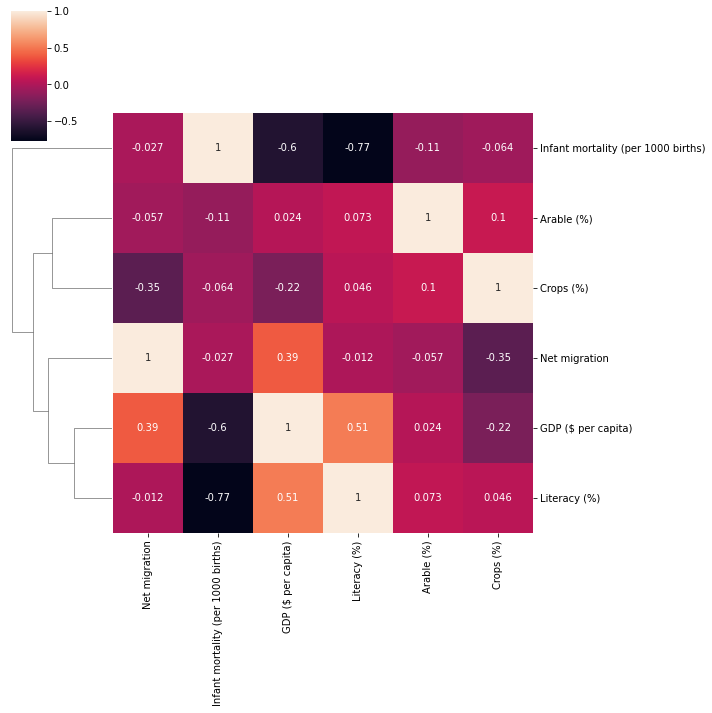

In [56]:
plt.figure(figsize=(16,8),dpi=200)
sns.clustermap(X.corr(),col_cluster=False,annot=True)
#we can see which features are being clustered together

In [57]:
X =pd.get_dummies(X)

# CLUSTERING

### Kmeans Model




In [58]:
from sklearn.cluster import KMeans

In [59]:
ssd = []

for k in range(2,30):
    model = KMeans(n_clusters=k)
    model.fit(X)
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

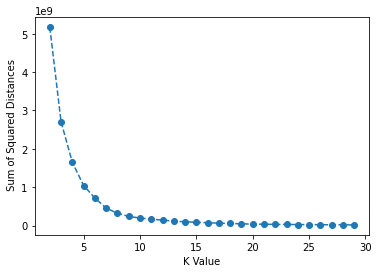

In [60]:
plt.plot(range(2,30),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [61]:
parameters = {'n_clusters': [2, 3, 4, 5, 10,15,16, 20,23,25,27 ,30]}

parameter_grid = ParameterGrid(parameters)
best_score = -1

In [62]:
for g in parameter_grid:
    model = KMeans(**g)
    model.fit(X)

    ss = metrics.silhouette_score(X, model.labels_)
    print('Parameter: ', g, 'Score: ', ss)
    if ss > best_score:
        best_score = ss
        best_grid = g

Parameter:  {'n_clusters': 2} Score:  0.7258672500104111
Parameter:  {'n_clusters': 3} Score:  0.6641656731616776
Parameter:  {'n_clusters': 4} Score:  0.6190139373699849
Parameter:  {'n_clusters': 5} Score:  0.6256135734006979
Parameter:  {'n_clusters': 10} Score:  0.5853774295760298
Parameter:  {'n_clusters': 15} Score:  0.5446885555421473
Parameter:  {'n_clusters': 16} Score:  0.557469782802337
Parameter:  {'n_clusters': 20} Score:  0.575209972554391
Parameter:  {'n_clusters': 23} Score:  0.5695968214144903
Parameter:  {'n_clusters': 25} Score:  0.5708937815750189
Parameter:  {'n_clusters': 27} Score:  0.5595102242338206
Parameter:  {'n_clusters': 30} Score:  0.5683071372681197


### We will choose n_cluster =3

In [63]:
np.random.seed(42)# random seed to get the same cluster labels.

In [64]:
model = KMeans(n_clusters=3)  #fitting kmeans model
model.fit(X)

KMeans(n_clusters=3)

In [65]:
X['K=3 Clusters'] = model.labels_  #adding a new column to the dataframe X

In [66]:
iso_codes = pd.read_csv(r'C:/Users/User/Desktop/country_iso_codes.csv')#import iso code dataset

In [67]:
iso_codes.head(3)

Country  \
0                                      Afghanistan   
1  Akrotiri and Dhekelia – See United Kingdom, The   
2                                    Åland Islands   

                                          ISO Code  
0                                              AFG  
1  Akrotiri and Dhekelia – See United Kingdom, The  
2                                              ALA

In [68]:
iso_map = iso_codes.set_index('Country')['ISO Code'].to_dict()

In [69]:
iso_map

{'Afghanistan': 'AFG',
 'Akrotiri and Dhekelia – See United Kingdom, The': 'Akrotiri and Dhekelia – See United Kingdom, The',
 'Åland Islands': 'ALA',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'American Samoa': 'ASM',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Anguilla': 'AIA',
 'Antarctica\u200a[a]': 'ATA',
 'Antigua and Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Aruba': 'ABW',
 'Ashmore and Cartier Islands – See Australia.': 'Ashmore and Cartier Islands – See Australia.',
 'Australia\u200a[b]': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas (the)': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bermuda': 'BMU',
 'Bhutan': 'BTN',
 'Bolivia (Plurinational State of)': 'BOL',
 'Bonaire\xa0Sint Eustatius\xa0Saba': 'BES',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Bouvet Island': 'BVT',
 'Brazil': 'BRA',
 'British Indian Ocean Territory (the)': 'IOT',
 'British V

In [70]:
df['ISO Code'] = df['Country'].map(iso_map)

In [71]:
df['Cluster'] = model.labels_ # adding a new column to the dataframe

In [72]:
import plotly.express as px

fig = px.choropleth(df, locations="ISO Code",
                    color="Cluster", 
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale='Turbo'
                    )
fig.show()

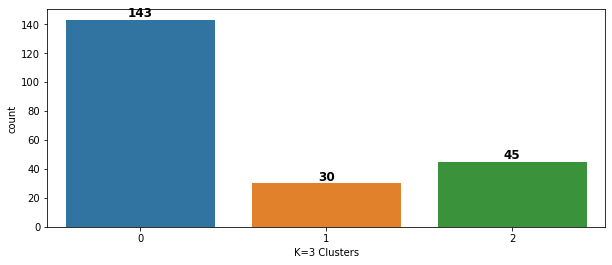

In [73]:
# counting number of labels
fig = plt.figure(figsize = (10,4))
ax = sns.countplot(x=X["K=3 Clusters"])
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
plt.show()

### Plotting boxplots between our features and cluster to check what those 3 clusters represents

Text(0.5, 1.0, 'Literacy vs label')

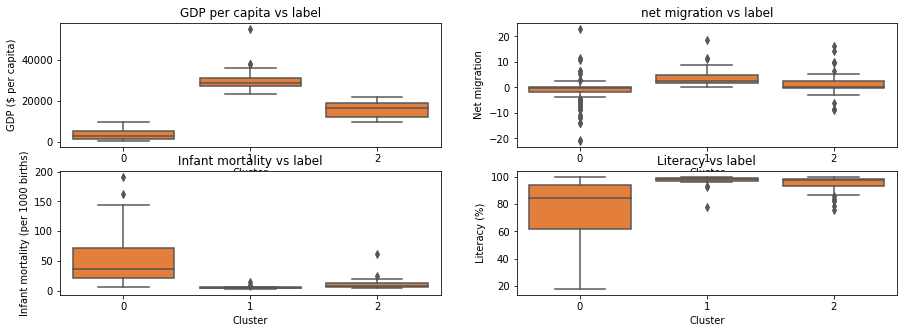

In [74]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (15,5))

sns.boxplot(data=df,x = 'Cluster', y = 'GDP ($ per capita)', color = '#FF781F',ax=axs[0,0]);

sns.boxplot(data=df,x = 'Cluster', y = 'Net migration', color = '#FF781F',ax=axs[0,1]);

sns.boxplot(data=df,x = 'Cluster', y = 'Infant mortality (per 1000 births)', color = '#FF781F',ax=axs[1,0]);

sns.boxplot(data=df,x = 'Cluster', y = 'Literacy (%)', color = '#FF781F',ax=axs[1,1]);

axs[0,0].set_title("GDP per capita vs label")
axs[0,1].set_title("net migration vs label")
axs[1,0].set_title("Infant mortality vs label")
axs[1,1].set_title("Literacy vs label")

### We can clearly see that cluster number 1 have better economy and are better contries in general, than we have cluster 2 than cluster 0 are countries in need.

In [75]:
#Now that we identified what each cluster means we can transform them into categories based on the economic situation of each country.
df['Cluster'].loc[df['Cluster'] == 2] = "Might Need Help"
df['Cluster'].loc[df['Cluster'] == 0] = 'Help Needed'
df['Cluster'].loc[df['Cluster'] == 1] = 'No Help Needed'


X['K=3 Clusters'].loc[X['K=3 Clusters'] == 2] = "Might Need Help"
X['K=3 Clusters'].loc[X['K=3 Clusters'] == 0] = 'Help Needed'
X['K=3 Clusters'].loc[X['K=3 Clusters'] == 1] = 'No Help Needed'

#We are doing the same for X and df just to simplify things for later

C:\Users\User\AppData\Local\Temp\ipykernel_8560\706549630.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp\ipykernel_8560\706549630.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [76]:
X=X[['Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Arable (%)', 'Crops (%)','K=3 Clusters']]

#X without dummy variables for pairplot

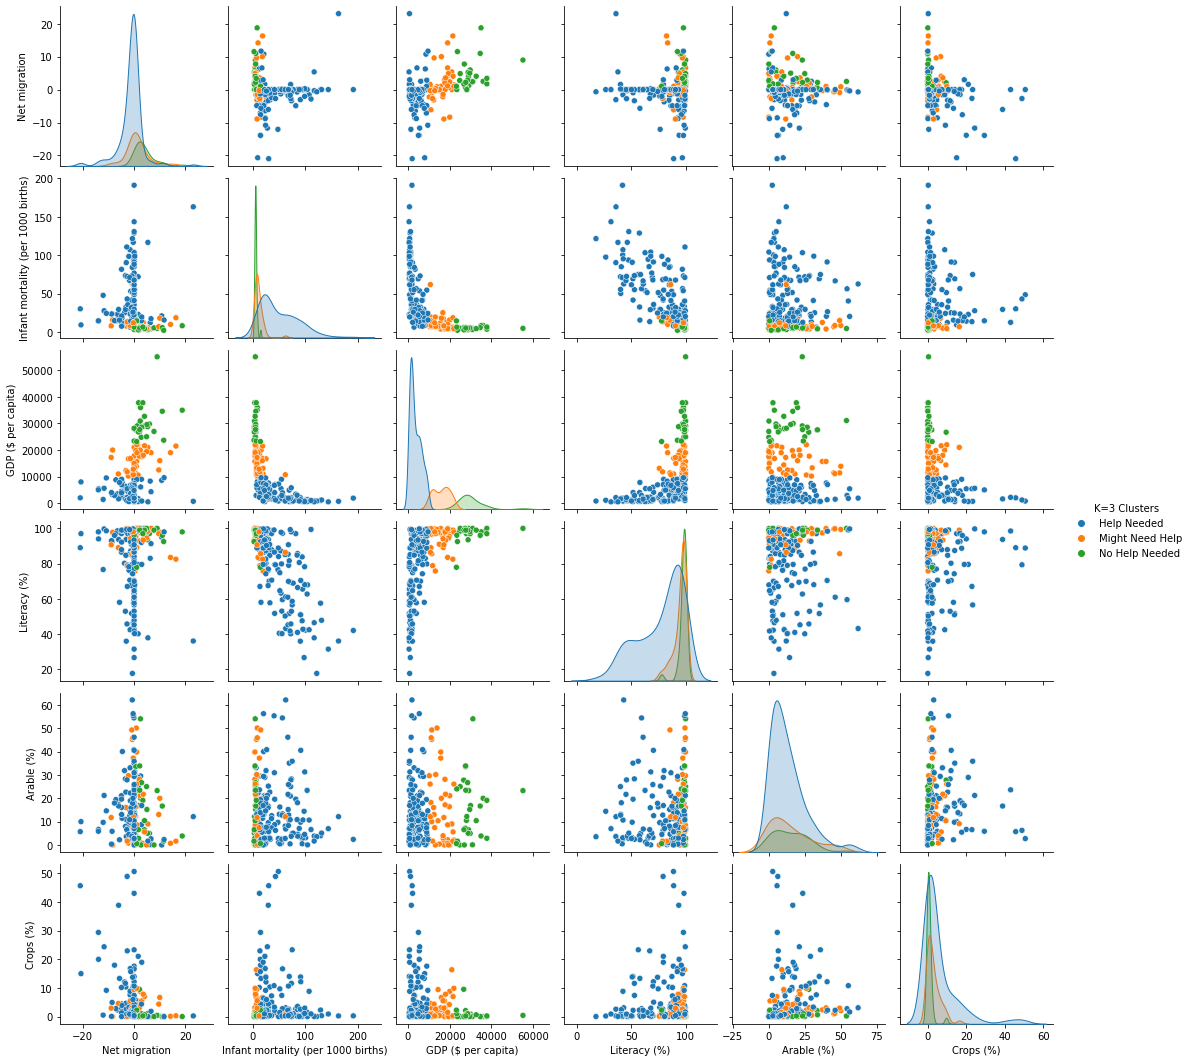

In [77]:
sns.pairplot(X, hue ='K=3 Clusters')

### We can clearly see clusters between gdp per capita and other features.

# Plotting the same map as before but with known categories

In [78]:
fig = px.choropleth(df[['Country','Cluster']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = df['Cluster'],  
                    color_discrete_map={'Noise / Outliers' : 'Black',
                                        'Help Needed':'Red',
                                        'Might Need Help':'Yellow',
                                        'No Help Needed':'Green',
                                        })
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')